In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import mrob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
graph = mrob.FGraphDiff()

# TODO give more nodes, such as a rectangle.
x = np.random.randn(3)
n1 = graph.add_node_pose_2d(x)
x = 1 + np.random.randn(3)*1e-1
n2 = graph.add_node_pose_2d(x)
print('node 1 id = ', n1, ' , node 2 id = ', n2)


invCov = np.identity(3)
graph.add_factor_1pose_2d_diff(np.array([0,0,np.pi/4]),n1,1e6*invCov)
graph.add_factor_2poses_2d_diff(np.ones(3),n1,n2,invCov)
graph.add_factor_2poses_2d_diff(np.ones(3),n1,n2,invCov)

graph.add_factor_1pose_2d_diff(np.ones(3) + np.array([0,0,np.pi/4]),n2,invCov)

[graph.add_factor_1pose_2d_diff(np.ones(3) + np.array([0,0,np.pi/4]),n2,invCov) for i in range(10)]

n3 = graph.add_node_pose_2d(x)
graph.add_factor_2poses_2d_diff(np.ones(3) + np.array([0,0,np.pi/4]),n2,n3,invCov)
graph.add_factor_2poses_2d_diff(np.ones(3) + np.array([0,0,np.pi/4+0.001]),n2,n3,invCov)

graph.solve(mrob.FGraphDiff_GN)
graph.print(True)
gradient = graph.get_dchi2_dz()


node 1 id =  0  , node 2 id =  1
Status of graph:  Nodes = 3, Factors = 0, Diff Factors = 16, Eigen Factors = 0
Printing NodePose2d: 0, state = 
3.68043e-06
 6.5575e-08
   0.785395
Printing NodePose2d: 1, state = 
0.665415
0.994039
  1.7854
Printing NodePose2d: 2, state = 
  0.6122
 2.40725
-2.71189
Printing DiffFactor: 0, obs= 
       0
       0
0.785398
 Residuals= 
0.0789196
 0.271168
  -2.5328 
and Information matrix
1e+06     0     0
    0 1e+06     0
    0     0 1e+06
 Calculated Jacobian = 
1 0 0
0 1 0
0 0 1
 Chi2 error = 3.24741e+06 and neighbour Nodes 1
Printing DiffFactor:1, obs= 
1
1
1
 Residuals=
 -1.91812
-0.31305
 1.57043 
and Information matrix
1 0 0
0 1 0
0 0 1
 Calculated Jacobian = 
 0.175686  0.984446   0.68695 -0.175686 -0.984446         0
-0.984446  0.175686  0.918121  0.984446 -0.175686         0
        0         0        -1         0         0         1
 Chi2 error = 3.12173 and neighbour Nodes 2
Printing DiffFactor:2, obs= 
1
1
1
 Residuals=
 -1.91812
-0.31305


Text(0, 0.5, 'state dim')

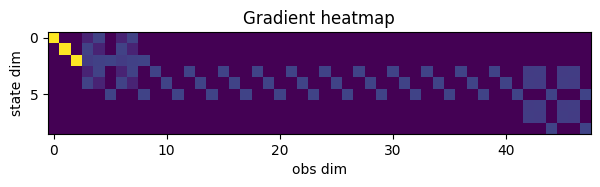

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(np.log(gradient**2+0.001))
plt.title('Gradient heatmap')
plt.xlabel('obs dim')
plt.ylabel('state dim')

In [1]:
A = graph.get_adjacency_matrix()
# plt.imshow(A.todense())
plt.spy(A.todense())


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/nosmokingsurfer/miniconda3/envs/theseus_env/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/nosmokingsurfer/miniconda3/envs/theseus_env/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

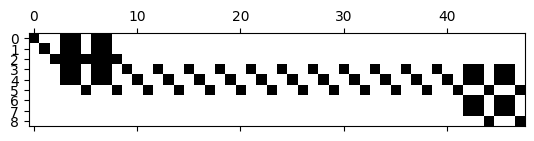

In [8]:
plt.spy(gradient)

Current chi2 =  2308145.482959392
chi2 after solve: 688044.6019549619
Current chi2 =  2936626.1219638903
chi2 after solve: 1000716.1428231375
Current chi2 =  2405935.8282908117
chi2 after solve: 1000444.6336990754
Current chi2 =  2453001.0364193833
chi2 after solve: 822690.95734589


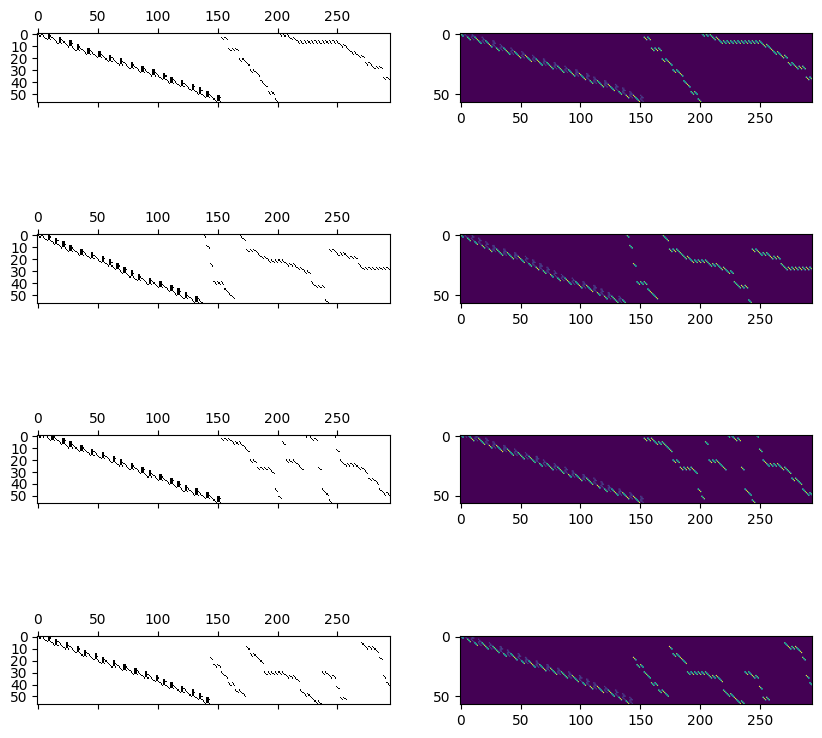

In [28]:
from graph_generator import generate_random_graph

N_graphs = 4

fig,ax = plt.subplots(N_graphs,2,figsize=(10,10))

for i in range(N_graphs):
    graph = generate_random_graph(20, 100)

    graph.solve(mrob.FGraphDiff_GN)
    print(f'chi2 after solve: {graph.chi2()}')
    gradient = graph.get_dchi2_dz()
    ax[i,0].spy(gradient)
    ax[i,1].imshow(np.log(gradient**2+0.001))

In [50]:
graph